In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('task2_data.csv')
data.head()

,pay1,pay2,y
0,2.89738,0.057948,1
1,10.38230,8.777660,0
2,14.00400,87.967200,1
3,104.30600,45.734200,1
4,80.88530,113.010600,1


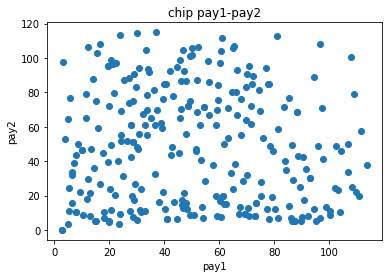

In [2]:
#数据可视化
from matplotlib import pyplot as plt
fig=plt.figure()
plt.scatter(data.loc[:,'pay1'],data.loc[:,'pay2'])
plt.title('pay1-pay2')
plt.xlabel('pay1')
plt.ylabel('pay2')
plt.show()

In [3]:
#建立筛选类别变量mask
mask=data.loc[:,'y']==1
print(mask)

0       True
1      False
2       True
3       True
4       True
       ...  
268     True
269     True
270    False
271    False
272    False
Name: y, Length: 273, dtype: bool


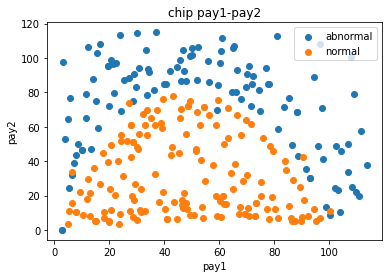

In [5]:
fig=plt.figure()
abnormal=plt.scatter(data.loc[:,'pay1'][mask],data.loc[:,'pay2'][mask])
normal=plt.scatter(data.loc[:,'pay1'][~mask],data.loc[:,'pay2'][~mask])
plt.title('chip pay1-pay2')
plt.xlabel('pay1')
plt.ylabel('pay2')
plt.legend((abnormal,normal),('abnormal','normal'))
plt.show()

In [7]:
#Xy赋值
X=data.drop(['y'],axis=1)
y=data.loc[:,'y']
print(X.shape,y.shape)

(273, 2) (273,)


In [9]:
from sklearn.linear_model import LogisticRegression
LR1=LogisticRegression()
LR1.fit(X,y)

LogisticRegression()

In [10]:
y_predict=LR1.predict(X)
print(y_predict)

[0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0
 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1
 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1
 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0
 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0
 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 1 1 0 1 0]


In [11]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y,y_predict)
print(accuracy)

0.8021978021978022


In [12]:
theta0=LR1.intercept_[0]
theta1,theta2=LR1.coef_[0][0],LR1.coef_[0][1]
print(theta0,theta1,theta2)

-4.408912980966199 0.019871842206776492 0.05845462890840053


In [13]:
x1=data.loc[:,'pay1']
x2_new=-(theta0+theta1*x1)/theta2

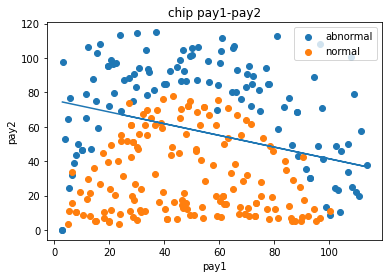

In [14]:
fig2=plt.figure()
abnormal=plt.scatter(data.loc[:,'pay1'][mask],data.loc[:,'pay2'][mask])
normal=plt.scatter(data.loc[:,'pay1'][~mask],data.loc[:,'pay2'][~mask])
plt.plot(x1,x2_new)
plt.title('chip pay1-pay2')
plt.xlabel('pay1')
plt.ylabel('pay2')
plt.legend((abnormal,normal),('abnormal','normal'))
plt.show()

In [17]:
x2=data.loc[:,'pay2']
#生成二次项
x1_2=x1*x1
x2_2=x2*x2
x1x2=x1*x2
print(x1_2.shape,x2_2.shape,x1x2.shape)

(273,) (273,) (273,)


In [20]:
#创建二次分类边界数据
x_new={'x1':x1,'x2':x2,'x1_2':x1_2,'x2_2':x2_2,'x1x2':x1x2}
x_new=pd.DataFrame(x_new)
print(x_new)

            x1          x2          x1_2          x2_2         x1x2
0      2.89738    0.057948      8.394811      0.003358     0.167896
1     10.38230    8.777660    107.792153     77.047315    91.132299
2     14.00400   87.967200    196.112016   7738.228276  1231.892669
3    104.30600   45.734200  10879.741636   2091.617050  4770.351465
4     80.88530  113.010600   6542.431756  12771.395712  9140.896284
..         ...         ...           ...           ...          ...
268   64.94970  106.091800   4218.463530  11255.470027  6890.630582
269   16.66000  108.059800    277.555600  11676.920376  1800.276268
270   19.31590   39.515800    373.103993   1561.498450   763.283241
271   63.01810   70.852400   3971.280928   5020.062586  4464.983628
272   24.38630   55.457000    594.691628   3075.478849  1352.391039

[273 rows x 5 columns]


In [21]:
#建立新模型
LR2=LogisticRegression()
LR2.fit(x_new,y)

LogisticRegression()

In [24]:
y2_predict=LR2.predict(x_new)
print(y2_predict)

[0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0
 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1
 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0
 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0
 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 1 1 0 0 0]


In [26]:
#模型评估
accuracy=accuracy_score(y,y2_predict)
print(accuracy)

0.9743589743589743


In [27]:
theta0=LR2.intercept_[0]
theta1,theta2,theta3,theta4,theta5=LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]
print(theta0,theta1,theta2,theta3,theta4,theta5)

-0.006357384395132591 -0.8915343079043941 0.15639358173548715 0.008762425862037772 0.0011621091405805094 0.0006825490016405275


In [34]:
x1=x1.sort_values()
print(x1)

0        2.89738
89       2.89738
155      3.13883
200      3.86318
14       4.82897
         ...    
266    109.13500
92     109.85900
214    110.82500
48     111.54900
243    113.72200
Name: pay1, Length: 273, dtype: float64


In [35]:
a=theta4
b=theta5*x1+theta2
c=theta0+theta1*x1+theta3*x1*x1
x2_new_2=(-b+np.sqrt(b*b-4*a*c))/(2*a)

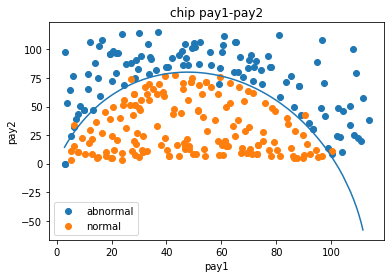

In [36]:
fig3=plt.figure()
abnormal=plt.scatter(data.loc[:,'pay1'][mask],data.loc[:,'pay2'][mask])
normal=plt.scatter(data.loc[:,'pay1'][~mask],data.loc[:,'pay2'][~mask])
plt.plot(x1,x2_new_2)
plt.title('chip pay1-pay2')
plt.xlabel('pay1')
plt.ylabel('pay2')
plt.legend((abnormal,normal),('abnormal','normal'))
plt.show()

In [39]:
#新样本预测
x_test=np.array([[80,20]])
y_predict=LR1.predict(x_test)
print('abnormal' if y_predict==1 else 'normal')

normal


In [40]:
x_test=np.array([[80,20,80*80,20*20,80*20]])
y_predict=LR2.predict(x_test)
print('abnormal' if y_predict==1 else 'normal')

normal
